## Transformed and Derived Variables

We frequently need to transform and derive new variables because of 
- Observations from our graphical analysis
- Necessary changes to make the modeling more effective
- Changes to make the analytics more efficient

In [1]:
# Data
import pandas as pd
import numpy as np
import scipy as sp
import os
import string as st
from collections import Counter
import json
from sklearn.preprocessing import StandardScaler

# Statistics
import statsmodels.api as sm
import statsmodels.sandbox.tools.tools_pca as sm_pca
from statsmodels.formula.api import ols as sm_ols
from statsmodels.stats.anova import anova_lm as sm_anova
from patsy.contrasts import Treatment

# Plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

# Check for errors

/Users/Pan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load the accident data

In [4]:
# Read the JSON file
# Make the keys integers again

path = "/Users/Pan/Google Drive/Data Science/DS6001/"

file = "TrainNarratives.txt"


with open(path + file) as json_file:  
    Narrative_dict = json.load(json_file)
    
str_index = [int(x) for x in Narrative_dict.keys()]

Narrative_dict = dict(zip(str_index, Narrative_dict.values()))


In [5]:
# Load the train accident data

path = "/Users/Pan/Google Drive/Data Science/DS6001/"

file = "TrainAccidents_Clean.csv"

accidents_df = pd.read_csv(path + file, low_memory = False)

accidents_df.shape

# Putting Narrative back into the dataframe

accidents_df['Narrative'] = Narrative_dict.values()

accidents_df.shape

(38167, 88)

## In-Class Exercise 1

Look at the variable CAUSE. How can we create a variable that will be more efficient for our analysis (i.e., has fewer categories)?

In [6]:
accidents_df['CAUSE'].value_counts()
#H means Human Factor
#T means track

T110    2350
H702    2068
H306    1478
T314    1025
H307     994
T220     946
M405     723
T207     699
H704     612
H503     548
H607     526
T221     525
H302     517
M404     478
H018     457
M411     457
T111     429
T109     424
H303     422
T210     411
H318     409
E53C     403
H020     403
M599     393
T202     393
H312     390
T102     372
T311     362
M101     359
T001     350
        ... 
E02L       2
E67L       2
H99B       2
E0HL       2
E7AL       2
E6AL       2
S101       1
H515       1
H304       1
E61L       1
E24L       1
H517       1
S008       1
E4TL       1
H99D       1
E40L       1
E63L       1
E03L       1
E34L       1
E25L       1
E01C       1
S001       1
E36L       1
E52L       1
E04L       1
M303       1
E31L       1
E19C       1
E33L       1
E35L       1
Name: CAUSE, Length: 359, dtype: int64

In [7]:
accidents_df['MajorCause']=accidents_df['CAUSE'].apply(lambda x:x[0])
accidents_df.MajorCause.value_counts()
    

H    14345
T    12685
M     5478
E     4839
S      820
Name: MajorCause, dtype: int64

## In-Class Exercise 2

Create a new variable, Casualties, that is the sum of total killed and total injured and add it to the dataframe. Look at the summary statistics of this variable and comment on what they mean.

In [9]:
accidents_df['Casualties']=accidents_df['TOTKLD']+accidents_df['TOTINJ']
accidents_df.Casualties.describe()
#Almost all records don't result in casualties
#1001 not believable

count    38167.000000
mean         0.123353
std          5.951747
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1001.000000
Name: Casualties, dtype: float64

## Visualizing by aggregating and grouping data with the derived variables.

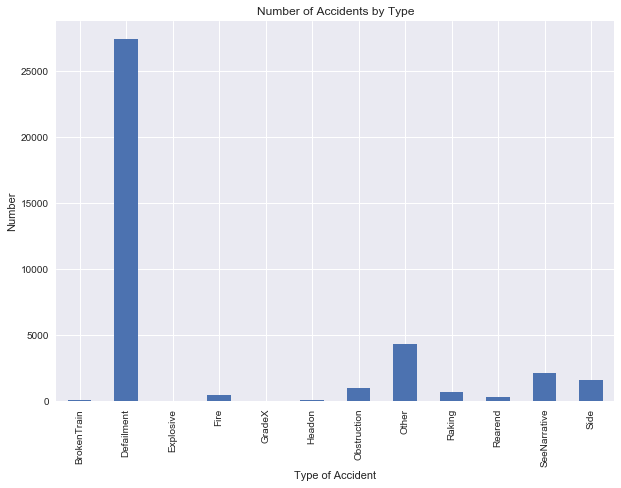

In [10]:
# Grouping to plot the number of accidents by accident type

plt.figure(figsize=(10, 7))

cost_type =accidents_df['ACCDMG'].groupby(accidents_df['TYPE']).size().plot(kind ='bar')
cost_type.set_title("Number of Accidents by Type")
cost_type.set_ylabel("Number")
cost_type.set_xlabel("Type of Accident")

#Derailment, Other, SeeNarrative

## In-Class Exercise 3

Use grouping to plot

- The total cost of accidents by accident type
- The total number of casualties by accident type
- The number of accidents by major cause (new derived variable)
- The cost of accidents by major cause
- The number of casualties by major cause

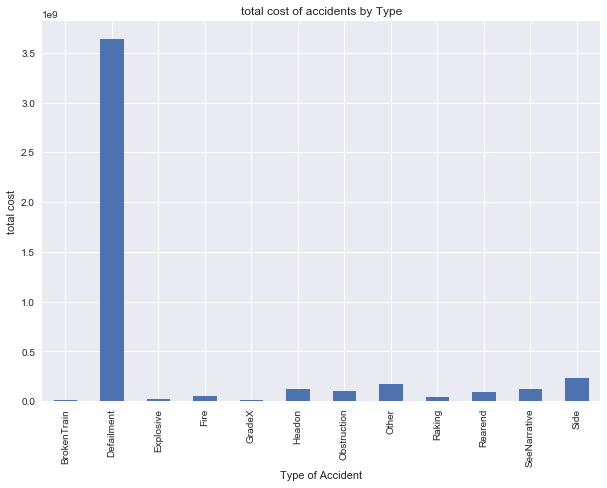

In [15]:
#The total cost of accidents by accident type
plt.figure(figsize=(10, 7))

cost_type =accidents_df['ACCDMG'].groupby(accidents_df['TYPE']).sum().plot(kind ='bar')
cost_type.set_title("total cost of accidents by Type")
cost_type.set_ylabel("total cost")
cost_type.set_xlabel("Type of Accident")

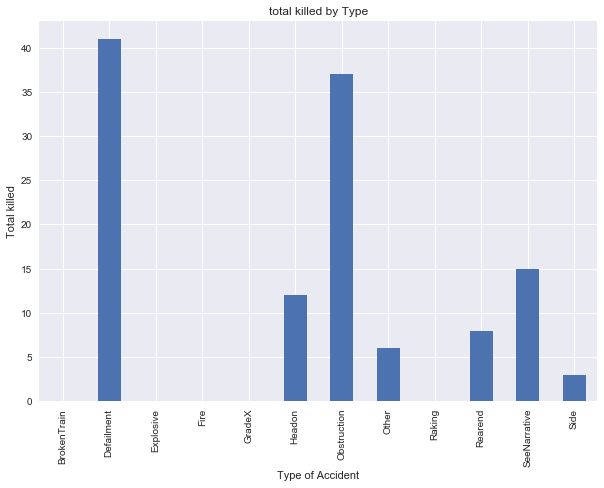

In [17]:
#The total number of kiled by accident type
plt.figure(figsize=(10, 7))

cost_type =accidents_df['TOTKLD'].groupby(accidents_df['TYPE']).sum().plot(kind ='bar')
cost_type.set_title("total killed by Type")
cost_type.set_ylabel("Total killed")
cost_type.set_xlabel("Type of Accident")
#obstruction

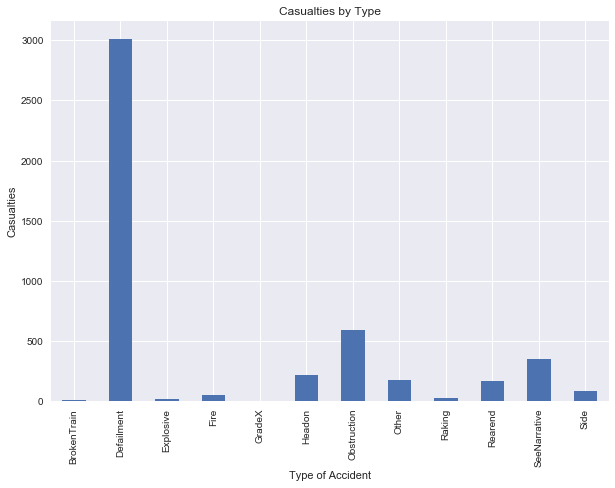

In [16]:
#The total number of casualties by accident type
plt.figure(figsize=(10, 7))

cost_type =accidents_df['Casualties'].groupby(accidents_df['TYPE']).sum().plot(kind ='bar')
cost_type.set_title("Casualties by Type")
cost_type.set_ylabel("Casualties")
cost_type.set_xlabel("Type of Accident")
#obstruction dropped down a a lot

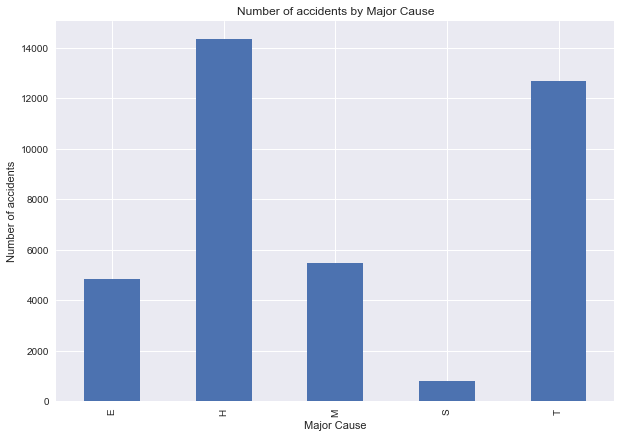

In [13]:
#The number of accidents by major cause (new derived variable)
plt.figure(figsize=(10, 7))

cost_type =accidents_df['ACCDMG'].groupby(accidents_df['MajorCause']).size().plot(kind ='bar')
cost_type.set_title("Number of accidents by Major Cause")
cost_type.set_ylabel("Number of accidents")
cost_type.set_xlabel("Major Cause of accident")
#Human factor is the biggest factor 
#Track 

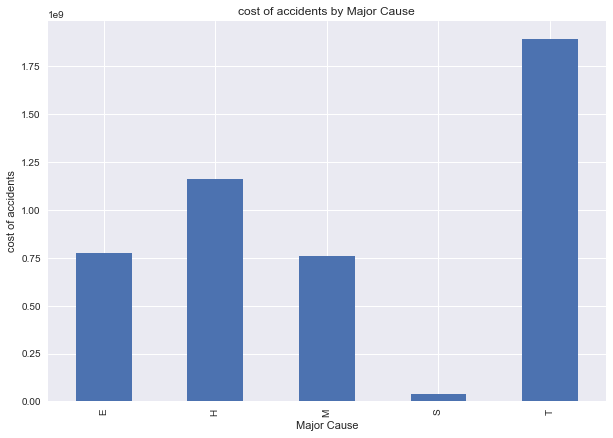

In [18]:
#The cost of accidents by major cause
plt.figure(figsize=(10, 7))

cost_type =accidents_df['ACCDMG'].groupby(accidents_df['MajorCause']).sum().plot(kind ='bar')
cost_type.set_title("cost of accidents by Major Cause")
cost_type.set_ylabel("cost of accidents")
cost_type.set_xlabel("Major Cause")
#Track is the biggest thing
#derailment is the biggest thing, which can be caused by track issues. 

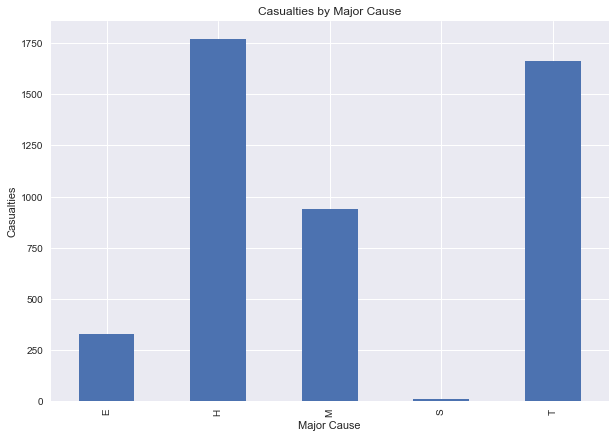

In [19]:
#The number of casualties by major cause
plt.figure(figsize=(10, 7))

cost_type =accidents_df['Casualties'].groupby(accidents_df['MajorCause']).sum().plot(kind ='bar')
cost_type.set_title("Casualties by Major Cause")
cost_type.set_ylabel("Casualties")
cost_type.set_xlabel("Major Cause")

## In-Class Exercise 4

Look at a distributional plot (box plots) of accident cost vs. accident type and another plot vs. major cause. What transformation does this plot suggest? Make the transformation to create a new variable in the dataframe and plot again.

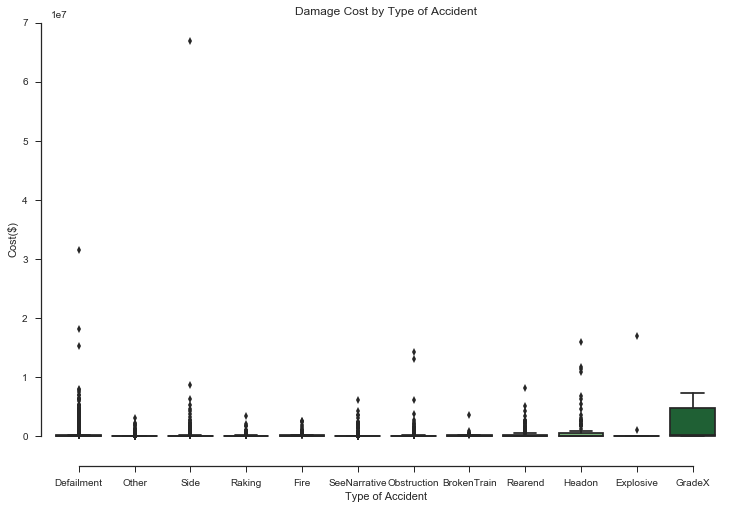

In [25]:
#distributional plot (box plots) of accident cost vs. accident type
sns.set(style="ticks")
plt.figure(figsize=(12,8))

#Draw boxplots
accdmg_bp=sns.boxplot(x="TYPE",y="ACCDMG",data=accidents_df,palette="PRGn")
sns.despine(offset=10,trim=True)
accdmg_bp.set_title("Damage Cost by Type of Accident")
accdmg_bp.set_ylabel("Cost($)")
accdmg_bp.set_xlabel("Type of Accident")

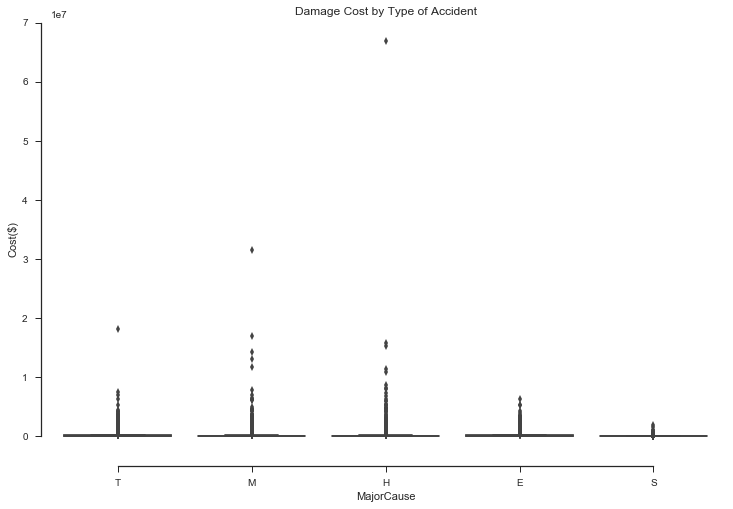

In [26]:
#accident cost vs. major cause
sns.set(style="ticks")
plt.figure(figsize=(12,8))

#Draw boxplots
accdmg_bp=sns.boxplot(x="MajorCause",y="ACCDMG",data=accidents_df,palette="PRGn")
sns.despine(offset=10,trim=True)
accdmg_bp.set_title("Damage Cost by Type of Accident")
accdmg_bp.set_ylabel("Cost($)")
accdmg_bp.set_xlabel("MajorCause")

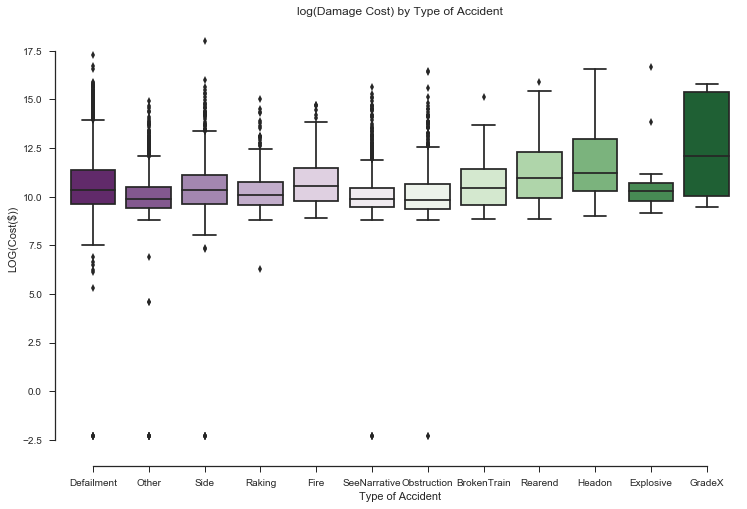

In [32]:
#log transform
accidents_df["LOGACCDMG"]=np.log(accidents_df["ACCDMG"]+.1)
#accident cost vs. accident type
sns.set(style="ticks")
plt.figure(figsize=(12,8))

#Draw boxplots
accdmg_bp=sns.boxplot(x="TYPE",y="LOGACCDMG",data=accidents_df,palette="PRGn")
sns.despine(offset=10,trim=True)
accdmg_bp.set_title("log(Damage Cost) by Type of Accident")
accdmg_bp.set_ylabel("LOG(Cost($))")
accdmg_bp.set_xlabel("Type of Accident")

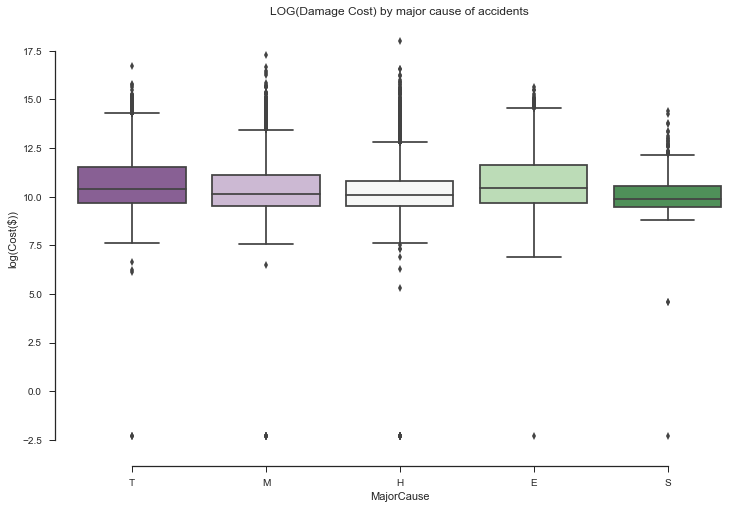

In [33]:
#log transform
#accident cost vs. major cause
sns.set(style="ticks")
plt.figure(figsize=(12,8))

#Draw boxplots
accdmg_bp=sns.boxplot(x="MajorCause",y="LOGACCDMG",data=accidents_df,palette="PRGn")
sns.despine(offset=10,trim=True)
accdmg_bp.set_title("LOG(Damage Cost) by major cause of accidents")
accdmg_bp.set_ylabel("log(Cost($))")
accdmg_bp.set_xlabel("MajorCause")

## In-Class Exercise 5

Look at a distributional plot (box plots) of Casualties vs. accident type and another plot vs. major cause. Does this plot suggest a similar transformation as you did for ACCDMG? Make the transformation to create a new variable in the dataframe and plot again. Comment on what your observe.

Log is not suitable here, since the casualties var is not continuous.

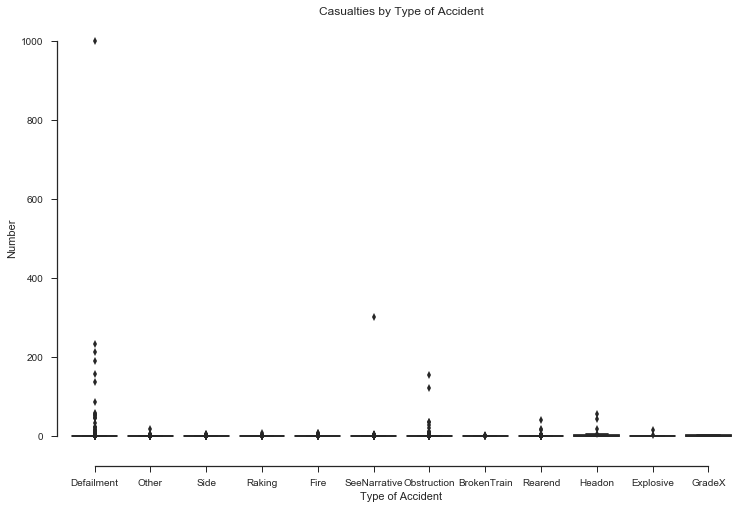

In [29]:
sns.set(style="ticks")
plt.figure(figsize=(12,8))

#Draw boxplots
accdmg_bp=sns.boxplot(x="TYPE",y="Casualties",data=accidents_df,palette="PRGn")
sns.despine(offset=10,trim=True)
accdmg_bp.set_title("Casualties by Type of Accident")
accdmg_bp.set_ylabel("Number")
accdmg_bp.set_xlabel("Type of Accident")

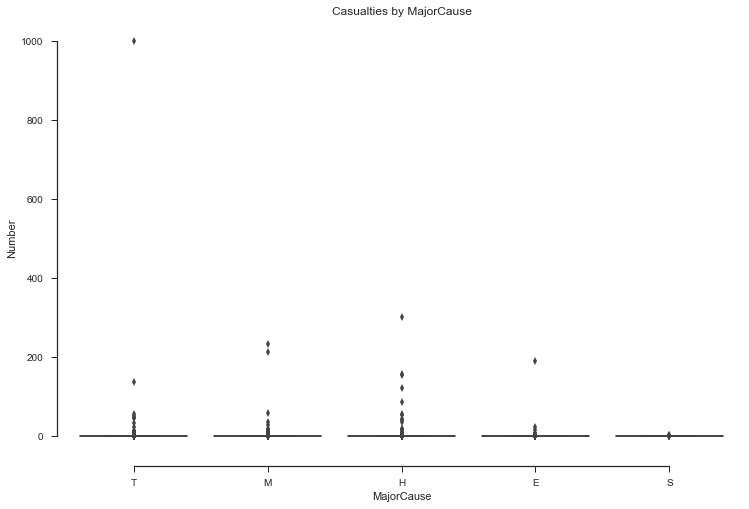

In [40]:
sns.set(style="ticks")
plt.figure(figsize=(12,8))

#Draw boxplots
accdmg_bp=sns.boxplot(x="MajorCause",y="Casualties",data=accidents_df,palette="PRGn")
sns.despine(offset=10,trim=True)
accdmg_bp.set_title("Casualties by MajorCause")
accdmg_bp.set_ylabel("Number")
accdmg_bp.set_xlabel("MajorCause")

In [30]:
accidents_df["LogCasualties"]=np.log(accidents_df['Casualties']+.1)

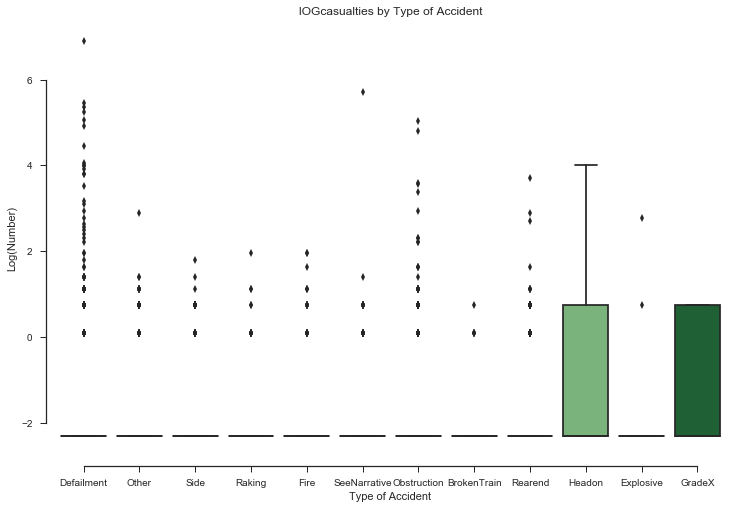

In [35]:
sns.set(style="ticks")
plt.figure(figsize=(12,8))

#Draw boxplots
accdmg_bp=sns.boxplot(x="TYPE",y="LogCasualties",data=accidents_df,palette="PRGn")
sns.despine(offset=10,trim=True)
accdmg_bp.set_title("lOGcasualties by Type of Accident")
accdmg_bp.set_ylabel("Log(Number)")
accdmg_bp.set_xlabel("Type of Accident")

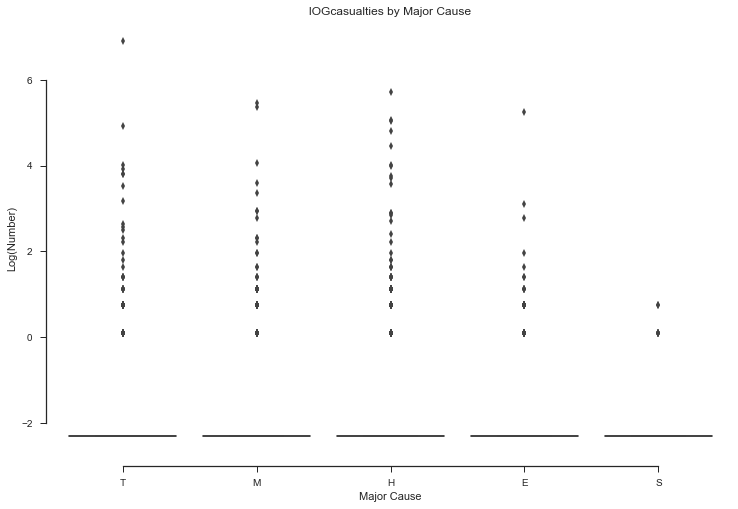

In [34]:
#log is a horrible idea since most of them are 0
#number of casualties: continuous 

sns.set(style="ticks")
plt.figure(figsize=(12,8))

#Draw boxplots
accdmg_bp=sns.boxplot(x="MajorCause",y="LogCasualties",data=accidents_df,palette="PRGn")
sns.despine(offset=10,trim=True)
accdmg_bp.set_title("lOGcasualties by Major Cause")
accdmg_bp.set_ylabel("Log(Number)")
accdmg_bp.set_xlabel("Major Cause")

## In-Class Exercise 6 

Look at box plots of TRNSPD and TONS. What transformation is suggeted? Make the transformation and replot.

Scaled transforamtion for TRNSPD and TONS.

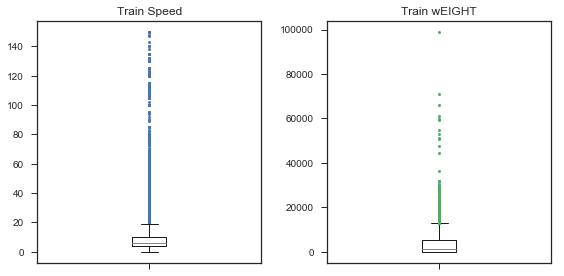

In [36]:
#these are predictor variables
#they are skewed
#y-axis scales are different 

#Comparison of predictor variables
fig,(box1,box2)=plt.subplots(ncols=2,figsize=(8,4))

box1.boxplot('TRNSPD',data=accidents_df,sym='b.')
box1.set_title('Train Speed')
box1.set_xticklabels('')

box2.boxplot('TONS',data=accidents_df,sym='g.')
box2.set_title('Train wEIGHT')
box2.set_xticklabels('')

fig.tight_layout()

In [38]:
#Transform predictors using mean and sd
#could also use max-min

scaler=StandardScaler()
accidents_df[['TRNSPD','TONS']]=accidents_df[['TRNSPD','TONS']].astype(np.float64)
accidents_df[['SpeedScale','TonsScale']]= pd.DataFrame(scaler.fit_transform(accidents_df[['TRNSPD','TONS']]))
accidents_df[['SpeedScale','TonsScale']].describe()

,SpeedScale,TonsScale
count,3.816700e+04,3.816700e+04
mean,2.627139e-15,3.123442e-16
std,1.000013e+00,1.000013e+00
min,-7.255309e-01,-7.038866e-01
25%,-4.513477e-01,-7.038866e-01
50%,-3.142561e-01,-4.719605e-01
75%,-4.007290e-02,3.918075e-01
max,9.556339e+00,1.998141e+01


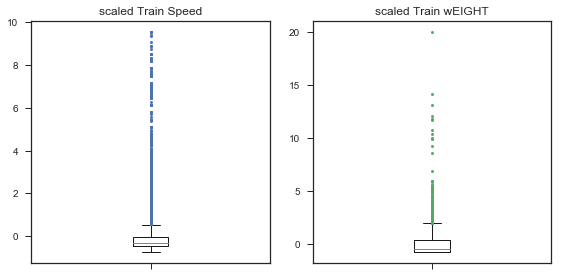

In [39]:
fig,(box1,box2)=plt.subplots(ncols=2,figsize=(8,4))

box1.boxplot('SpeedScale',data=accidents_df,sym='b.')
box1.set_title('scaled Train Speed')
box1.set_xticklabels('')

box2.boxplot('TonsScale',data=accidents_df,sym='g.')
box2.set_title('scaled Train wEIGHT')
box2.set_xticklabels('')

fig.tight_layout()

In [ ]:
#fig,(scatter1,scatter2)=plt.subplots(ncols=2,figsize=(12,8))

#scatter1.scatter('SpeedScale',"LOGACCDMG",data=accidents_df)
#scatter.set_title('Log(Cost) of damage vs. Train Speed (scaled)')##

#scatter1.scatter('SpeedScale',"LOGACCDMG",data=accidents_df)
#scatter.set_title('Log(Cost) of damage vs. Train Speed (scaled)')